# Session 4: Fitting to arbitrary functions

_Script author: louise.dash@ucl.ac.uk    
Updated: 27/01/2021_

<div class="alert alert-success"> <p><b>Intended learning outcomes:</b> </p>
By the end of this session, you should be able to:
<ul>
<li> fit data to any arbitrary function using scipy.optimize.curve_fit; </li>
<li> quantitatively evaluate the goodness of fit;  </li>
<li> reach physical conclusions based on these results. </li>
</div>

We've already seen how to fit histograms to a Gaussian, and how to use a polynomial to fit a set of data. The last thing we're going to do in this Data Analysis part of the course is to see how to perform a fit to an arbitrary function. 

In these examples, we'll be looking at whether a Lorentzian or Gaussian functions provide a better fit to some optical lineshape data. However, you can use the same method to fit *any* function, provided you can write a suitable Python function to describe your target "fit" function.

### Context for this example

The data we'll use for this session is taken from the Lab 3 Zeeman effect experiment, which some of you will do yourselves in PHAS0058. 

The Zeeman effect occurs when a spectral line is split into different components by a magnetic field. The physics of the Zeeman effect will be covered in detail in PHAS0023 "Atomic and Molecular Physics".

The Lab 3 experiment examines how the lines in the emission spectrum of a mercury discharge lamp split under a magnetic field. The student records the spectrum using a CCD camera, which yields data in the form of recorded intensity (in counts per second) vs pixel position (in pixels). 

We're not going to be considering the *positions* of the spectral lines in this task, instead we're going to be looking at the *lineshapes*. Rather than a spectral line with a single energy, the line is broadened into a wider peak by various physical effects. For example, the uncertainty principle leads to broadening which has a Lorentzian form, while there will also be thermal broadening effects, which are Gaussian in nature (there are also several other sources of broadening, with different effects). In theory, for this experiment, Lorentzian broadening is expected to dominate.

In this task we will look at an experimental spectral line recorded by a student in the Lab 3 experiment, fit it to both a Gaussian and Lorentzian, and determine which provides a better fit.

### Getting started with the code

First, we'll import the modules we will need. The new function we import in the cell below comes from the scipy.optimize library - more on this later, when we come to use it. 

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize

plt.rcParams["patch.force_edgecolor"] = True # include outlines on histograms etc



Now we can import the csv (Comma Separated Value) file with the data the student collected, and plot it. You will need to download this file from Moodle, and as usual, put it in the same directory as this notebook.

<IPython.core.display.Javascript object>


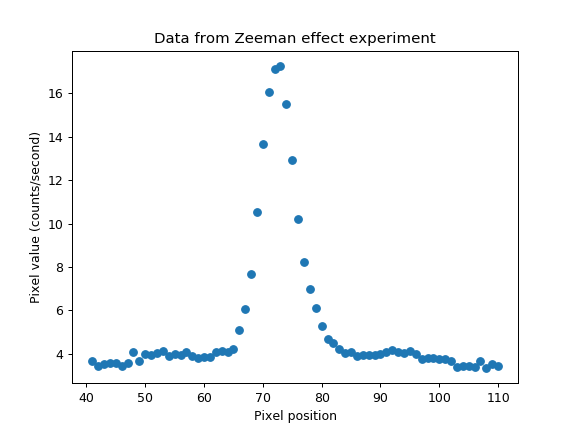

In [2]:
# import the data...
xdata,ydata = np.loadtxt('Zeeman_data.csv',delimiter=",",unpack=True) # reminder: need to set delimiter for csv files

# ...and plot it.
plt.figure()
plt.plot(xdata,ydata, 'o')
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect experiment");

We can see that we have a single peak with a constant background level. It looks feasible to attempt fitting this to a Gaussian.


In order to use `curve_fit` to fit this to a Gaussian, we need to write a "target" function to fit to, which in this case will be


$$
f(x) = y_0 + h \exp \left(\frac{-(x-x_0)^2}{2 \sigma^2}\right)
$$

(This is a slightly different definition from the one we used when we were fitting histograms to Gaussians in Session 2. Can you see why?)

The parameters for our Gaussian fit will be the mean value (`x0`), the standard deviation (`sigma`), the background value `y0` and the peak height, `h`. Here is a function that will do exactly this.

In [4]:
def gaussian(x,x0,sigma, y0, h):
    '''Returns a single value or 1D array of Gaussian function values for 
    - input x-value or array of x-values: x
    - mean value of distribution: x0
    - standard deviation of distribution: sigma
    - background value y0
    - peak height, h (measured from background level y0)'''
    gauss = h * np.exp(-(x-x0)**2/(2*sigma**2)) + y0 # the gaussian itself
    return gauss

The three parameters, x0, y0 and sigma, are (as yet) unknown. To find them, we use the scipy.optimize.curve_fit function. The full documentation for this is here: http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

We're going to do this in the simplest way possible for the moment, by just sending curve_fit the target function (our "`gaussian`" function), the independent variable (`xdata`) and the dependent variable (`ydata`). We can also, optionally, choose to send an initial guess of the parameters, as well as weightings for each of the ydata data points, but for the moment we won't do that.

The `curve_fit` routine returns two arrays. 
 * The first of these is an array of the fitted parameters - in our case this array will have four elements, as we have four parameters, `x0`, `sigma`, `y0`, and `h`.
 * The second is the matrix of covariance - an indication of the goodness of fit. We covered this in Session 3 when we were doing polynomial fitting.
 
 Let's do this, and see what results we get back:

In [5]:
#popt: Optimized parameters
#pcov: matrix of covariance.
popt,pcov = curve_fit(gaussian,xdata,ydata)

print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [1.         1.         5.30499999 1.        ]
pcov :
 [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


C:\Users\Shameer\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


We can see that this hasn't worked so well - `curve_fit` hasn't been able to find a fit to the data.

Instead, we'll try to make life easier for `curve_fit` by giving an initial guess for the parameters. From looking at the plot of the data, we can see that the peak is at around $x=75$, and the background around $y=3.5$. We'll try a value of 10 for $\sigma$. These values need to be given in the form of a python list of numbers, in the same order as parameters are given to our "`gaussian`" function. Remember - in Python we use `[` square brackets `]` to define a list, with the elements separated by commas.

In [6]:
guess = [75,10,3.5,18] # list of initial guess parameters
# what type of object does the variable "guess" represent?
print ("The variable 'guess' is a ", type(guess) )

The variable 'guess' is a  <class 'list'>


Now we can retry the fit:

In [7]:
popt,pcov = curve_fit(gaussian,xdata,ydata,p0=guess)
print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [72.50930905  3.01525268  3.85742572 13.40680375]
pcov :
 [[ 2.02507205e-03 -3.74999230e-10  4.61324597e-12  1.63272286e-09]
 [-3.74999230e-10  2.22561783e-03 -6.30519907e-04 -4.05620889e-03]
 [ 4.61324597e-12 -6.30519907e-04  1.98236679e-03 -1.40174504e-03]
 [ 1.63272286e-09 -4.05620889e-03 -1.40174504e-03  3.10175059e-02]]


This has worked (or it should have done)! We can use the information from the matrix of covariance to calculate the error on each parameter, just as we did in the previous session for the polynomial coefficients. Remember, the error on the parameters are given by the *square roots* of the diagonal elements of the matrix of covariance.


**A python aside / hint: ** When dealing with an array like `popt` that contains numbers each representing different variables, it's sometimes useful to be able to "unpack" the array into different variables - we've already seen examples of this in the code cell above and in the second code cell when unpacking the data from the file. To unpack `popt`, we could use a line of code like:

           x0_fit, sigma_fit, y0_fit, h_fit = popt

If we wanted to then calculate the fitted line at a given x-value (in this case at x = 65), we could then use something like:
        
           fitted_point = gaussian(65, x0_fit, sigma_fit, y0_fit, h_fit)
           
or, if we don't want/need to assign individual variable names to the elements of `popt` (or whichever array we are dealing with), we could use:

           fitted_point = gaussian(65, popt[0], popt[1], popt[2], popt[3])
           
This is a bit unwieldy though, so sometimes it's useful to be able to unpack the array automatically when calling a function by using \* syntax, like this:

           fitted_point = gaussian(65, *popt)
This is much easier to deal with! You can find a fuller discussion of this in [Hill: Learning Scientific Programming with Python](https://ucl.rl.talis.com/link?url=http%3A%2F%2Flibproxy.ucl.ac.uk%2Flogin%3Fqurl%3Dhttps%253A%252F%252Fdoi.org%252F10.1017%252FCBO9781139871754&sig=4365629c2ea92d4fcb051461f54a3acbb281f6c211fe3ec598976f845929ec6c) section 2.4.3 (page 49).

The code cell below demonstrates that the two methods do give identical results:

In [8]:
# specifying the elements by hand:
print("At x = 65 our fitted Gaussian has a value of: ", gaussian(65, popt[0], popt[1], popt[2], popt[3]))

# use *syntax to unpack the elements of popt automatically:
print("Calculating the same value using * syntax:    ", gaussian(65,*popt)) 
print("Both give the same result!")

At x = 65 our fitted Gaussian has a value of:  4.460698388343549
Calculating the same value using * syntax:     4.460698388343549
Both give the same result!


<div class="alert alert-success"> 
In the cell below, you should:
<ul>
<li> calculate the errors on the parameters </li>
<li>output each parameter with its error and an appropriate text string </li>
<li>plot the original data and the fitted line on a single, appropriately labelled graph.  </li>
</ul>
<br>
    <b>HINT:</b> make sure you include enough points in your fitted line to give a smooth curve, particularly at the peak.

Once you've done this, use the checkpoint quiz on Moodle to check that your code is generating the correct numbers here (and also for the Lorentzian fit later).

</div>

<a href="https://moodle.ucl.ac.uk/mod/quiz/view.php?id=2756901" class="btn btn-primary" role="button">Click here to go open the Moodle checkpoint quiz in a new tab</a>

Fit Parameter 0 = 72.50930904832356 ± 0.04500080058737785
Fit Parameter 1 = 3.0152526754151086 ± 0.04717645417786105
Fit Parameter 2 = 3.8574257202078033 ± 0.04452377780513221
Fit Parameter 3 = 13.406803754684061 ± 0.17611787490240707


<IPython.core.display.Javascript object>


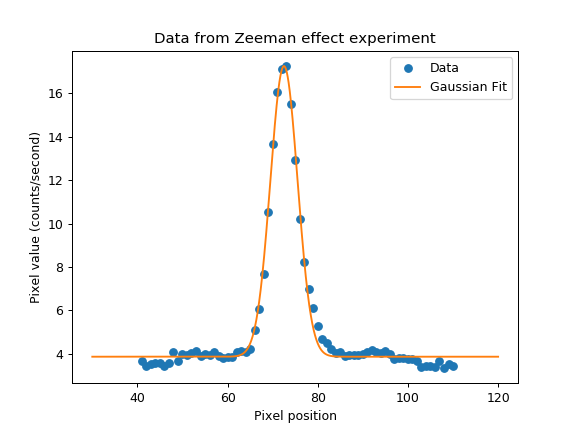

In [9]:
### STUDENT COMPLETED CELL ###


#loop for fitting parameters and their errors:
for i in range(len(popt)):
    'error is the square-root of the diagonal elements of the covariance matrix'
    'the covariance matrix is labelled here as "pcov"  '
    'the fitting parameters are given in "popt" '
    'The fit parameter 0 is x0, 1 is sigma, 2 is y0 and 3 is h'
    
    err = np.sqrt(np.diag(pcov))#error
    
    print("Fit Parameter {0} = {1} \xb1 {2}".format(i,popt[i],err[i]))

    
x0, sigma, y0, h = popt #define the fitting parameters with variabel names
    
x = np.linspace(30, 120, 10000) #large array of x-values for smoothness of fit line
y = gaussian(x, x0, sigma, y0, h) #y-values as the gaussian fit equation 

plt.figure()
plt.plot(xdata,ydata, 'o', label="Data")
plt.plot(x,y, label="Gaussian Fit")
plt.legend()
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect experiment")
plt.show()

If you've done this correctly, you should obtain a good fit to the data.

In theory we'd expect a Lorentzian to produce a better fit for this data. Now you're going to try this out and see if this is what we find for this particular data set!

The appropriate form for this is 
$$
f(x) = y_0 + \frac{h}{1 + ((x - x_0)/b)^2}
$$
where $y_0$ is the background level, $x_0$ is the peak position and $b$ is the half-width at half-maximum (HWHM) of the peak, and $h$ the height of the peak relative to the background level.

<div class="alert alert-success"> 
First, write a properly formatted python function, similar in form to the "gaussian" function above, that will return a Lorentzian function for these parameters.
</div>

In [10]:
### STUDENT COMPLETED CELL ###

def lorentzian(x, y0, x0, b, h):
    '''Returns a single value or 1D array of Lorentzian function values for 
    - input x-value or array of x-values: x
    - x-position of peak of fit: x0
    -  half-width at half-maximum (HWHM) of the peak: b
    - background value y0
    - peak height, h (relative to the background level y0)'''
    
    lorentz = y0 + h/(1 + ((x-x0)/b)**2 ) #equation
    return lorentz



<div class="alert alert-success"> 
Now provide an initial guess for these parameters, and use curve_fit to calculate the best Lorentzian fit for this data. Output the calculated parameters and the matrix of covariance, just like we did for the Gaussian fit.
</div>

In [11]:
### STUDENT COMPLETED CELL ###
guess2 = [3.5,75,5,14] #the guess of the lorentzian parammeters

#fitting parameters of Lorentz fit(popt2) and the covariance matrix:
popt2,pcov2 = curve_fit(lorentzian,xdata,ydata,p0=guess2) 

print ("popt :\n", popt2)
print ("pcov :\n", pcov2)


popt :
 [ 3.36145618 72.48067195  3.08300274 14.8851885 ]
pcov :
 [[ 4.90691751e-03 -3.26712107e-06 -3.39309891e-03 -1.07969888e-03]
 [-3.26712107e-06  3.41521439e-03  1.97145123e-06  1.19651975e-06]
 [-3.39309891e-03  1.97145123e-06  9.19525523e-03 -1.57727215e-02]
 [-1.07969888e-03  1.19651975e-06 -1.57727215e-02  7.99005585e-02]]


<div class="alert alert-success"> 
Now use these results to
<ul>
<li>calculate the error on each parameter</li>
<li>output each parameter with its error (and an appropriate text string)</li>
<li>plot the data, the fitted Gaussian and the fitted Lorentzian, all on the same labelled graph.</li>
</ul>


Once you've done this, use the checkpoint quiz on Moodle to check that your code is generating the correct numbers here.

</div>

<a href="https://moodle.ucl.ac.uk/mod/quiz/view.php?id=2756901" class="btn btn-primary" role="button">Click here to go open the Moodle checkpoint quiz in a new tab</a>

Fit Parrameter 0 = 3.361456177811222 ± 0.07004939336346916
Fit Parrameter 1 = 72.48067194666288 ± 0.05843983567484531
Fit Parrameter 2 = 3.083002743356648 ± 0.0958918934504012
Fit Parrameter 3 = 14.88518850365177 ± 0.28266686844032074


<IPython.core.display.Javascript object>


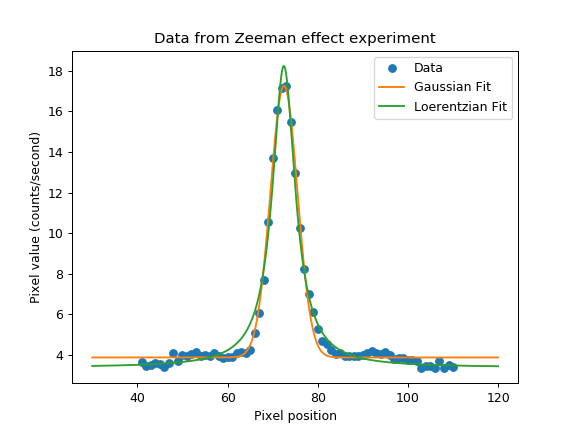

In [12]:
### STUDENT COMPLETED CELL ###

#loop for fitting parameters and their errors:
for i in range(len(popt2)):
    'The fit parameter 0 is y0, 1 is x0, 2 is b and 3 is h'
    
    err2 = np.sqrt(np.diag(pcov2))
    
    print("Fit Parrameter {0} = {1} \xb1 {2}".format(i,popt2[i],err2[i]))
    

y0, x0, b, h = popt2  #again, define the fitting parameters with variabel names
y2= lorentzian(x, y0, x0, b, h) #y-values as the Lorentzian fit equation 

plt.figure()
plt.plot(xdata,ydata, 'o', label="Data")
plt.plot(x,y, label = "Gaussian Fit")
plt.plot(x,y2, label ="Loerentzian Fit")
plt.legend()
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect experiment")
plt.show()

### Evaluating the goodness of fit

So now we have two potential fits to our data. Looking at them, it's hard to tell which one provides the better fit. We can do this quantitatively by calculating $\chi^2$ for each fit, in the same way as we did in the previous session. 

We'll also need to know the y-error on the data points for this - which for this experiment were estimated to be $\pm 1$ counts/second.

#### 1. Gaussian.

First we'll look at the Gaussian fit. 

<div class="alert alert-success"> 
In the cell below, 
<ul>
<li>calculate the residuals divided by the y-error</li>
<li>calculate the number of degrees of freedom</li>
<li>hence calculate $\chi^2$ for the Gaussian fit.</li>
</ul>
    
Refer back to the previous session if you need a reminder of any of the definitions.
    
<b>HINT:</b> set a variable to use for the y-error, then you'll be able to experiment with this value later.
</div>


The equations for the degrees of freedom, chi squared and reduced chi squared, repectivley, is given below:

Degrees of freedom: $$K = n-m$$

where $n$ is the  number of data points in the data set and $m$ is the number of fit parameters.

Chi squared: $$\chi^2 = \sum(\frac{residuals}{y-error})^2$$

Reduced chi squared fit: $$\chi^{2}_{reduced} = \frac{\chi^2}{K}$$


In [13]:
### STUDENT COMPLETED CELL ###

y_error = 1

x0, sigma, y0, h = popt #define the parameters, again
residuals = ydata - gaussian(xdata, x0, sigma, y0, h)/y_error #residuals with the y-error
residuals_sqrd = residuals**2                            #square of the residuals
chi_sqrd = sum_residuals_sqrd = np.sum(residuals_sqrd)  #sum of square of the residuals which = chi squared

dof = len(xdata) - len(popt)  # degrees of freedom
reduced_chi_squared = sum_residuals_sqrd/dof  


print("The chi squared for the Gaussian fit is:", chi_sqrd)
print("The reduced chi squared for the Gaussian fit is:", reduced_chi_squared)


The chi squared for the Gaussian fit is: 7.060808318722573
The reduced chi squared for the Gaussian fit is: 0.1069819442230693


#### 2. Lorentzian

<div class="alert alert-success"> Now do the same for the Lorentzian fit, in the cell below.</div>

In [14]:
### STUDENT COMPLETED CELL ###

y0, x0, b, h = popt2 #define the parameters, again
residuals2 = ydata - lorentzian(xdata, y0, x0, b, h)/y_error #residuals with the y-error
residuals_sqrd2 = residuals2**2                             #square of the residuals
chi_sqrd2 = sum_residuals_sqrd2 = np.sum(residuals_sqrd2)  #sum of square of the residuals which = chi squared

dof2 = len(xdata) - len(popt2) # degrees of freedom
reduced_chi_squared2 = sum_residuals_sqrd2/dof2

print("The chi squared for the Lorentzian fit is:", chi_sqrd2)
print("The reduced chi squared for the Lorentzian fit is:",reduced_chi_squared2)


The chi squared for the Lorentzian fit is: 12.723187241241215
The reduced chi squared for the Lorentzian fit is: 0.19277556426123052


<div class="alert alert-success">
<b> Are these the results you'd expect? Discuss briefly in a text cell.</b>
</div>

### STUDENT COMPLETED TEXT CELL ###

These results are not as expected since I was expecting the reduced chi squared was going to be closer to one (for both fits). This is because, from observing the fits, they both seemed decentlly good. However, I did expect that the reduced chi squared would be close because the fits seemed similar. This is the case here. Furthermore, it seems that the Lorentzian fit is slightly better than the Gaussian fit since the Lorentzian fit's reduced chi squared is  closer to 1. However, since both fits' reduced chi squared is far from 1, they both are not good fits for this data.

### Analysing the residuals

Another way of verifying the validity of our fits is to check the distribution of the residuals, and see if they follow a normal (Gaussian) distribution. Again, follow the same procedure as we did in the previous session and check the distribution of the calculated residuals for both fits. 




<div class="alert alert-success">
Do this in the code cells below. 
<ul>
<li>You can copy, paste and edit code from Session 3 if you want, rather than writing this from scratch. </li>

<li> You will also find it useful to look at the $x_0$ and $\sigma$ of the pdf of the residuals. Try changing your value of the yerror in the data (that you used to calculate the $\chi^2$) to the $\sigma$ you obtain here. What does this tell you?</li>
    
<li>Use a text cell to discuss what you conclude from these results.</li>
<li>Don't forget to change the yerror back to the value recorded by the student before submitting!</li>
</ul>
</div>

Fitted Gaussian: 
 Mean value  2.1760387777395147e-10 with standard deviation 0.31759831590779153


<IPython.core.display.Javascript object>


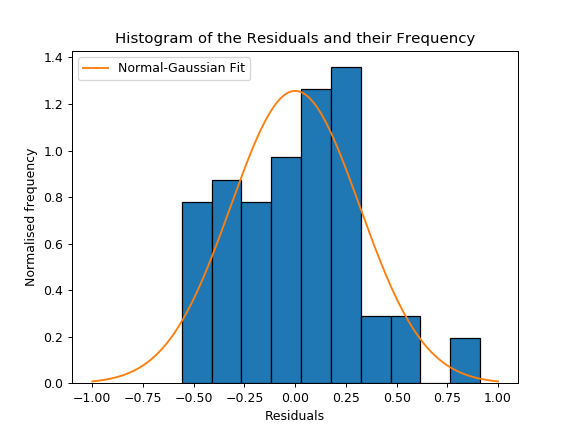

In [15]:
### STUDENT COMPLETED CELL ###

x0, sigma, y0, h = popt #need to define the parameters again for the Gaussian fit
residuals = ydata - gaussian(xdata, x0, sigma, y0, h)/y_error

x0_gauss, sigma_gauss = stats.norm.fit(residuals) #fitted normal-Gaussian x0 and sigma for the Gaussian fit
print ("Fitted Gaussian: \n Mean value ", x0_gauss, "with standard deviation", sigma_gauss)

x_values = np.linspace(-1,1,10000) #array of x-values for the histogram
gaussian_check = stats.norm.pdf(x_values,x0_gauss, sigma_gauss) #normal-gaussian fit

plt.figure()
plt.hist(residuals, density=True)
plt.plot(x_values, gaussian_check, label="Normal-Gaussian Fit")
plt.legend()
plt.xlabel("Residuals")
plt.ylabel("Normalised frequency")
plt.title("Histogram of the Residuals and their Frequency")
plt.show()

Fitted Gaussian: 
 Mean value  9.568538723263894e-10 with standard deviation 0.42633298926076235


<IPython.core.display.Javascript object>


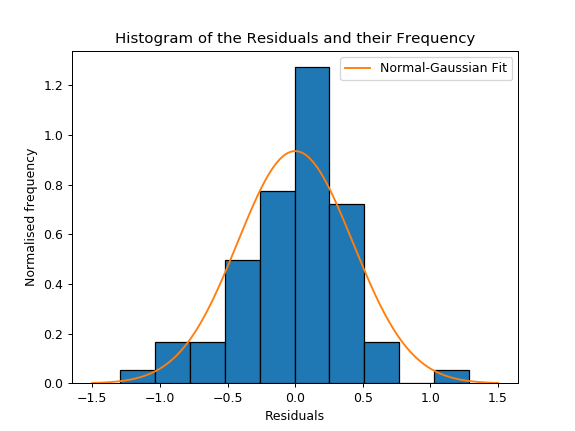

In [16]:
### STUDENT COMPLETED CELL ###

y0, x0, b, h = popt2#need to define the parameters again for the Lorentzian fit
residuals2 = ydata - lorentzian(xdata, y0, x0, b, h)/y_error

x0_lorentz, sigma_lorentz = stats.norm.fit(residuals2) #fitted normal-Gaussian x0 and sigma for the Lorentzian fit
print ("Fitted Gaussian: \n Mean value ", x0_lorentz, "with standard deviation", sigma_lorentz)

x_values = np.linspace(-1.5,1.5,10000) #array of x-values for this histogram
gaussian_check2 = stats.norm.pdf(x_values,x0_lorentz, sigma_lorentz) #normal-gaussian fit

plt.figure()
plt.hist(residuals2, density=True)
plt.plot(x_values, gaussian_check2, label="Normal-Gaussian Fit")
plt.legend()
plt.xlabel("Residuals")
plt.ylabel("Normalised frequency")
plt.title("Histogram of the Residuals and their Frequency")
plt.show()

### STUDENT COMPLETED TEXT CELL ###

_Don't forget to include your discussion here!_

#### Changing y-error:

Any deviation from $yerror = \pm 1$ , $\sigma$ is much (exponentially) higher. This implies that 1 is the correct y-error for this data set since it has the lowest standard deviation. Having a lower standard deviation means that the residuals are less distributed/spread-out; which implies a better fit.


#### Conclusion:

Looking at both histograms, the histogram for the Lorentzian fit residuals is more in-line with the normalised Gaussian fit. This means that, for the Lorerntzian fit, most residuals are 0 (on the fit line) and have less deviation from 0.  Therefore the Lorentzian fit is a better fit when fitting the data. 